<a href="https://colab.research.google.com/github/vathsal14/NOVO-NEUROTECH/blob/main/novonewparkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
# Installs the 'requests' library, which is used for making HTTP requests in Python. It simplifies interacting with web services and APIs.
# version: requests-2.32.3
!pip install mne
# Installs the 'mne' library, which is a powerful tool for processing, analyzing, and visualizing EEG, MEG, and other neurophysiological data.
# version: mne-1.9.0
!pip install pyedflib
# Installs the 'pyedflib' library, which allows reading and writing of EDF (European Data Format) and BDF (Biosemi Data Format) files, commonly used in EEG data storage.
# version: pyedflib-0.1.38
!pip install openneuro-py
# Installs the 'openneuro-py' library, a Python client for accessing and downloading datasets from OpenNeuro, a platform for neuroimaging data sharing.
# aiofiles-24.1.0 graphql-core-3.2.5 openneuro-py-2024.2.0 sgqlc-16.4
!pip install PyWavelets
# Installs the 'PyWavelets' library, which provides wavelet transform functions for signal processing, including denoising, feature extraction, and compression.
# version: PyWavelets-1.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyedflib: filename=pyEDFlib-0.1.39-cp311-cp311-linux_x86_64.whl size=2624432 sha256=b3b0fffb36f14d25fe08a231dd65628c67592ba4156cb269e98035c3b27ca8e7
  Stored in directory: /root/.cache/pip/wheels/6d/25/41/b9605de2c5973791e87828347971b06712b12a14add875bff6
Successfully built pyedflib
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.0 MB/s eta 0:00:00


In [ ]:
# Importing the Google Colab drive module
from google.colab import drive
# Mounting Google Drive to the Colab environment
# This allows you to access files stored in your Google Drive directly from the Colab notebook.
# The "/content/drive" is the directory where the Drive will be mounted.
# After mounting, you can interact with your Drive files as if they were local files.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install python-dotenv
# 'python-dotenv' is a library that allows you to manage environment variables from a `.env` file.
# This is particularly useful for securely storing sensitive information such as API keys, database credentials, etc.
# By using environment variables, you avoid hardcoding sensitive data directly in your code.

In [ ]:
import os  # The 'os' module is used to interact with the operating system, such as reading environment variables.
from dotenv import load_dotenv  # 'load_dotenv' is used to load environment variables from a .env file.
# Specify the path to the .env file
# The .env file stores environment variables like API keys securely.
# In this case, the .env file is located in the user's Google Drive.
env_path = '/content/drive/My Drive/ColabEnvFiles/API_KEY.env'
# Load the environment variables from the specified .env file
load_dotenv(env_path)
# Access the API key using the key name as defined in the .env file
api_key = os.getenv("OPENNEURO_API_KEY")
# Check if the API key was successfully loaded
if api_key:
    print("API Key loaded successfully!")  # Inform the user that the API key was loaded.
else:
    print("Failed to load API Key. Check your .env file and path.")  # Error message if loading fails.

API Key loaded successfully!


In [ ]:
import os
import openneuro

# Prompt the user to enter the dataset ID
dataset_id = input("Enter the dataset ID (e.g., ds002778): ")

# Validate the input
if not dataset_id:
    raise ValueError("Dataset ID must be provided.")

print(f"Processing dataset: {dataset_id}")

# Function to create a directory
def create_directory(dir_path):
    try:
        # Attempt to create the directory
        os.makedirs(dir_path, exist_ok=True)
        print(f"Directory created successfully at: {dir_path}")
    except PermissionError:
        # Handle permission errors
        print(f"Permission denied: Unable to create directory at {dir_path}. Please check permissions.")
    except OSError as e:
        # Handle other OS-related errors
        print(f"Error creating directory at {dir_path}: {e}")
    except Exception as e:
        # Catch any unexpected errors
        print(f"An unexpected error occurred: {e}")

# Determine the target directory for the download
target_dir = os.path.join(os.getcwd(), dataset_id)

# Create the target directory
create_directory(target_dir)

# Download the entire dataset
openneuro.download(dataset=dataset_id, target_dir=target_dir)

print(f"Dataset {dataset_id} downloaded successfully to {target_dir}.")


Processing dataset: ds002778
Directory created successfully at: /content/ds002778

👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds002778 …


📁 Traversing directories for ds002778 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 328 files (5 concurrent downloads). 
✅ Finished downloading ds002778.
 
🧠 Please enjoy your brains.
 
Dataset ds002778 downloaded successfully to /content/ds002778.


In [ ]:
import os
target_dir = '/content/ds002778'
raw_fname = target_dir

for subject_folder in os.listdir(raw_fname):

    if subject_folder.startswith('sub-'):
        subject_id = subject_folder.split('-')[1]
        print(f"Processing subject: {subject_id}")

        if subject_id.startswith('pd'):
            session_path = os.path.join(raw_fname, subject_folder, 'ses-off', 'eeg')
            session_type = 'ses-off'
        elif subject_id.startswith('hc'):
            session_path = os.path.join(raw_fname, subject_folder, 'ses-hc', 'eeg')
            session_type = 'ses-hc'
        else:
            print(f"Unknown subject type for {subject_id}. Skipping.")
            continue

        if not os.path.exists(session_path):
            print(f"No '{session_type}/eeg' folder found for subject {subject_id}. Skipping.")
            continue

        bdf_file = None
        for file in os.listdir(session_path):
            if file.endswith('.bdf') and f"sub-{subject_id}" in file:
                bdf_file = os.path.join(session_path, file)
                break

        if bdf_file:
            print(f"Found EEG file for subject {subject_id} ({session_type}): {bdf_file}")
        else:
            print(f"EEG .bdf file not found for subject {subject_id} in {session_type} session.")

Processing subject: pd26
Found EEG file for subject pd26 (ses-off): /content/ds002778/sub-pd26/ses-off/eeg/sub-pd26_ses-off_task-rest_eeg.bdf
Processing subject: hc7
Found EEG file for subject hc7 (ses-hc): /content/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf
Processing subject: hc1
Found EEG file for subject hc1 (ses-hc): /content/ds002778/sub-hc1/ses-hc/eeg/sub-hc1_ses-hc_task-rest_eeg.bdf
Processing subject: pd23
Found EEG file for subject pd23 (ses-off): /content/ds002778/sub-pd23/ses-off/eeg/sub-pd23_ses-off_task-rest_eeg.bdf
Processing subject: pd19
Found EEG file for subject pd19 (ses-off): /content/ds002778/sub-pd19/ses-off/eeg/sub-pd19_ses-off_task-rest_eeg.bdf
Processing subject: hc29
Found EEG file for subject hc29 (ses-hc): /content/ds002778/sub-hc29/ses-hc/eeg/sub-hc29_ses-hc_task-rest_eeg.bdf
Processing subject: pd17
Found EEG file for subject pd17 (ses-off): /content/ds002778/sub-pd17/ses-off/eeg/sub-pd17_ses-off_task-rest_eeg.bdf
Processing subject: hc2

In [ ]:
import os

raw_fname = target_dir

for subject_folder in os.listdir(raw_fname):
    if subject_folder.startswith('sub-'):
        subject_id = subject_folder.split('-')[1]
        print(f"Processing subject: {subject_id}")

        if subject_id.startswith('pd'):
            session_path = os.path.join(raw_fname, subject_folder, 'ses-off', 'eeg')
            session_type = 'ses-off'
        elif subject_id.startswith('hc'):
            session_path = os.path.join(raw_fname, subject_folder, 'ses-hc', 'eeg')
            session_type = 'ses-hc'
        else:
            print(f"Unknown subject type for {subject_id}. Skipping.")
            continue

        if not os.path.exists(session_path):
            print(f"No '{session_type}/eeg' folder found for subject {subject_id}. Skipping.")
            continue

        bdf_file = None
        for file in os.listdir(session_path):
            if file.endswith('.bdf') and f"sub-{subject_id}" in file:
                bdf_file = os.path.join(session_path, file)
                break

        if bdf_file:
            print(f"Found EEG file for subject {subject_id} ({session_type}): {bdf_file}")
            try:
                with open(bdf_file, 'rb') as f:
                    header = f.read(256)
                    print(f"Header for subject {subject_id}:\n{header}")
            except Exception as e:
                print(f"Error reading file {bdf_file}: {e}")
        else:
            print(f"EEG .bdf file not found for subject {subject_id} in {session_type} session.")


Processing subject: pd26
Found EEG file for subject pd26 (ses-off): /content/ds002778/sub-pd26/ses-off/eeg/sub-pd26_ses-off_task-rest_eeg.bdf
Header for subject pd26:
b'\xffBIOSEMI                                                                                                                                                                13.06.1112.00.2510752   24BIT                                       191     1       41  '
Processing subject: hc7
Found EEG file for subject hc7 (ses-hc): /content/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf
Header for subject hc7:
b'\xffBIOSEMI                                                                                                                                                                25.02.1113.25.0610752   24BIT                                       192     1       41  '
Processing subject: hc1
Found EEG file for subject hc1 (ses-hc): /content/ds002778/sub-hc1/ses-hc/eeg/sub-hc1_ses-hc_task-rest_eeg.bdf
Header for su

Number of channels: 41
Sampling frequency: 512.0 Hz
File duration: 188.0 seconds


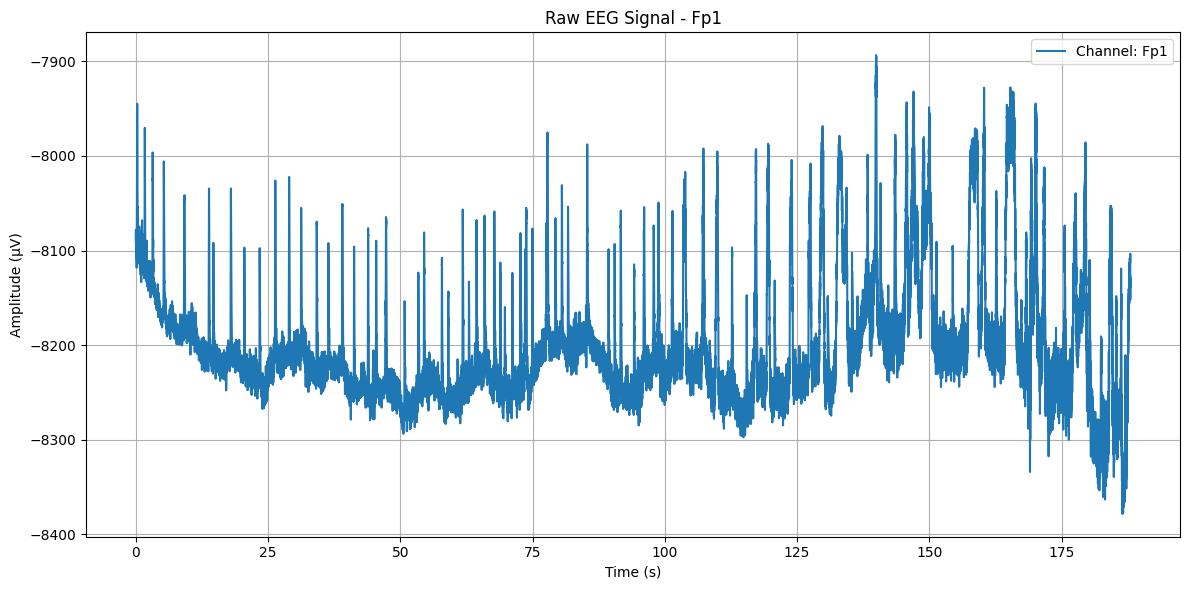

In [ ]:
import pyedflib
import matplotlib.pyplot as plt
import numpy as np

bdf_file = "/content/ds002778/sub-pd22/ses-off/eeg/sub-pd22_ses-off_task-rest_eeg.bdf"

try:

    with pyedflib.EdfReader(bdf_file) as f:
        n_channels = f.signals_in_file
        sample_frequency = f.getSampleFrequencies()[0]
        duration = f.file_duration
        print(f"Number of channels: {n_channels}")
        print(f"Sampling frequency: {sample_frequency} Hz")
        print(f"File duration: {duration} seconds")

        channel = 0
        signal = f.readSignal(channel)
        label = f.getLabel(channel)

    time = np.linspace(0, len(signal) / sample_frequency, len(signal))

    plt.figure(figsize=(12, 6))
    plt.plot(time, signal, label=f"Channel: {label}")
    plt.title(f"Raw EEG Signal - {label}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (µV)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error reading or plotting BDF file: {e}")

In [ ]:
# import os
# import mne
# import pandas as pd
# import numpy as np
# from scipy.signal import welch
# import matplotlib.pyplot as plt

# target_dir = "/content/ds002778"
# subject_dirs = [d for d in os.listdir(target_dir) if d.startswith('sub-')]

# print(f"Found {len(subject_dirs)} subjects in the dataset.")

# features_list = []
# epoch_length_sec = 5

# freq_bands = {
#     'delta': (1, 4),
#     'theta': (4, 8),
#     'alpha': (8, 12),
#     'beta': (12, 30),
#     'gamma': (30, 50)
# }

# def compute_band_power(epoch_data, sfreq, freq_bands):
#     power_features = {}
#     for band, (low, high) in freq_bands.items():
#         f, psd = welch(epoch_data, sfreq, nperseg=1024)

#         band_mask = (f >= low) & (f <= high)

#         power = np.sum(psd[:, band_mask], axis=1)
#         power_features[f'{band}_power'] = np.mean(power)
#     return power_features

# for subject in subject_dirs:
#     print(f"\nProcessing subject: {subject}")

#     if 'sub-pd' in subject:
#         raw_fname = os.path.join(target_dir, subject, 'ses-off', 'eeg', f'{subject}_ses-off_task-rest_eeg.bdf')
#     else:
#         raw_fname = os.path.join(target_dir, subject, 'ses-hc', 'eeg', f'{subject}_ses-hc_task-rest_eeg.bdf')

#     if not os.path.exists(raw_fname):
#         print(f"EEG data file not found for {subject}. Skipping.")
#         continue

#     try:
#         raw = mne.io.read_raw_bdf(raw_fname, preload=True)
#         raw_filtered = raw.filter(l_freq=0.5, h_freq=50, fir_design='firwin', verbose=True)
#         raw_filtered.drop_channels([ch for ch in raw_filtered.info['ch_names'] if 'EXG' in ch])
#         montage = mne.channels.make_standard_montage("standard_1020")
#         raw_filtered.set_montage(montage, on_missing="ignore")
#         ica = mne.preprocessing.ICA(n_components=20, random_state=42, max_iter=1000)
#         ica.fit(raw_filtered)
#         ica.plot_components()
#         ica.exclude = []
#         raw_cleaned = ica.apply(raw_filtered)

#         sfreq = raw.info['sfreq']
#         n_samples_per_epoch = int(epoch_length_sec * sfreq)
#         n_epochs = int(raw_filtered.n_times // n_samples_per_epoch)
#         if n_epochs == 0:
#             print(f"Not enough data for subject {subject}. Skipping.")
#             continue

#         events = np.array([[i * n_samples_per_epoch, 0, i] for i in range(n_epochs)])
#         event_id = {f"epoch_{i}": i for i in range(n_epochs)}
#         try:
#             epochs = mne.Epochs(
#                 raw_filtered, events, event_id=event_id, tmin=0, tmax=epoch_length_sec,
#                 baseline=None, detrend=1, preload=True, reject={'eeg': 100e-6}
#             )
#         except ValueError as e:
#             print(f"Error creating epochs for {subject}: {e}. Skipping.")
#             continue
#         plt.figure()
#         f, psd = welch(epochs[0].get_data().mean(axis=0), sfreq, nperseg=1024)
#         for band, (low, high) in freq_bands.items():
#             band_mask = (f >= low) & (f <= high)
#             plt.plot(f[band_mask], psd[band_mask].mean(axis=0), label=band)
#         plt.legend()
#         plt.title(f"Power Spectral Density for {subject}")
#         plt.show()

#         for epoch_idx, epoch_data in enumerate(epochs.get_data()):
#             band_power = compute_band_power(epoch_data.mean(axis=0), raw.info['sfreq'], freq_bands)
#             band_power['subject'] = subject
#             band_power['epoch'] = epoch_idx
#             features_list.append(band_power)

#         print(f"EEG data for {subject} processed successfully.")
#     except Exception as e:
#         print(f"Error processing data for subject {subject}: {e}")

# print(f"\nTotal epochs processed: {len(features_list)}")
# if features_list:
#     features_df = pd.DataFrame(features_list)
#     features_df.to_csv("eeg_features.csv", index=False)
#     print("Feature extraction complete. Features saved to 'eeg_features.csv'.")
# else:
#     print("No features extracted. The CSV will not be created.")

In [ ]:
# correct running making changes to upper one(final)
import os
import openneuro
import mne
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

subject_dirs = [d for d in os.listdir(target_dir) if d.startswith('sub-')]

print(f"Found {len(subject_dirs)} subjects in the dataset.")

features_list = []
epoch_length_sec = 5

for subject in subject_dirs:
    print(f"Processing subject: {subject}")

    if 'sub-pd' in subject:
        raw_fname = os.path.join(target_dir, subject, 'ses-off', 'eeg', f'{subject}_ses-off_task-rest_eeg.bdf')
    else:
        raw_fname = os.path.join(target_dir, subject, 'ses-hc', 'eeg', f'{subject}_ses-hc_task-rest_eeg.bdf')

    if not os.path.exists(raw_fname):
        print(f"EEG data file not found for {subject}. Skipping.")
        continue

    try:
        raw = mne.io.read_raw_bdf(raw_fname, preload=True)
        raw_filtered = raw.filter(l_freq=0.5, h_freq=50, fir_design='firwin', verbose=True)
        montage = mne.channels.make_standard_montage("standard_1020")
        raw_filtered.set_montage(montage, on_missing="ignore")

        ica = mne.preprocessing.ICA(n_components=20, random_state=42, max_iter=1000)
        ica.fit(raw_filtered)
        raw_cleaned = ica.apply(raw_filtered)

        sfreq = raw.info['sfreq']
        n_samples_per_epoch = int(epoch_length_sec * sfreq)
        n_epochs = int(raw_filtered.n_times // n_samples_per_epoch)

        events = np.array([[i * n_samples_per_epoch, 0, i] for i in range(n_epochs)])

        event_id = {f"epoch_{i}": i for i in range(n_epochs)}

        epochs = mne.Epochs(raw_filtered, events, event_id=event_id, tmin=0, tmax=epoch_length_sec, baseline=None, detrend=1, preload=True)

        freq_bands = {
            'delta': (1, 4),
            'theta': (4, 8),
            'alpha': (8, 12),
            'beta': (12, 30),
            'gamma': (30, 50)
        }

        def compute_band_power(epoch_data, sfreq, freq_bands):
            power_features = {}
            for band, (low, high) in freq_bands.items():
                f, psd = welch(epoch_data, sfreq, nperseg=1024)
                psd = psd[(f >= low) & (f <= high)]
                power = np.sum(psd)
                power_features[f'{band}_power'] = power
            return power_features

        for epoch_idx, epoch_data in enumerate(epochs.get_data()):
            band_power = compute_band_power(epoch_data.mean(axis=0), raw.info['sfreq'], freq_bands)
            band_power['subject'] = subject
            band_power['epoch'] = epoch_idx
            features_list.append(band_power)

        print(f"EEG data for {subject} loaded successfully.")
    except Exception as e:
        print(f"Error loading data for subject {subject}: {e}")

print(f"Total epochs processed: {len(features_list)}")

if features_list:
    features_df = pd.DataFrame(features_list)
    features_df.to_csv("eeg_features.csv", index=False)
    print("Feature extraction complete. Features saved to 'eeg_features.csv'.")
else:
    print("No features extracted. The CSV will not be created.")

Found 31 subjects in the dataset.
Processing subject: sub-pd26
Extracting EDF parameters from /content/ds002778/sub-pd26/ses-off/eeg/sub-pd26_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 14.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd26 loaded successfully.
Processing subject: sub-hc7
Extracting EDF parameters from /content/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 11.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc7 loaded successfully.
Processing subject: sub-hc1
Extracting EDF parameters from /content/ds002778/sub-hc1/ses-hc/eeg/sub-hc1_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc1 loaded successfully.
Processing subject: sub-pd23
Extracting EDF parameters from /content/ds002778/sub-pd23/ses-off/eeg/sub-pd23_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 104447  =      0.000 ...   203.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd23 loaded successfully.
Processing subject: sub-pd19
Extracting EDF parameters from /content/ds002778/sub-pd19/ses-off/eeg/sub-pd19_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 94719  =      0.000 ...   184.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
1 bad epochs dropped
EEG data for sub-pd19 loaded successfully.
Processing subject: sub-hc29
Extracting EDF parameters from /content/ds002778/sub-hc29/ses-hc/eeg/sub-hc29_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 101887  =      0.000 ...   198.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc29 loaded successfully.
Processing subject: sub-pd17
Extracting EDF parameters from /content/ds002778/sub-pd17/ses-off/eeg/sub-pd17_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd17 loaded successfully.
Processing subject: sub-hc21
Extracting EDF parameters from /content/ds002778/sub-hc21/ses-hc/eeg/sub-hc21_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc21 loaded successfully.
Processing subject: sub-hc24
Extracting EDF parameters from /content/ds002778/sub-hc24/ses-hc/eeg/sub-hc24_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc24 loaded successfully.
Processing subject: sub-pd12
Extracting EDF parameters from /content/ds002778/sub-pd12/ses-off/eeg/sub-pd12_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105983  =      0.000 ...   206.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 12.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 41 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd12 loaded successfully.
Processing subject: sub-pd9
Extracting EDF parameters from /content/ds002778/sub-pd9/ses-off/eeg/sub-pd9_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 9.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd9 loaded successfully.
Processing subject: sub-hc33
Extracting EDF parameters from /content/ds002778/sub-hc33/ses-hc/eeg/sub-hc33_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97279  =      0.000 ...   189.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 6.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
1 bad epochs dropped
EEG data for sub-hc33 loaded successfully.
Processing subject: sub-pd16
Extracting EDF parameters from /content/ds002778/sub-pd16/ses-off/eeg/sub-pd16_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96255  =      0.000 ...   187.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 5.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd16 loaded successfully.
Processing subject: sub-hc32
Extracting EDF parameters from /content/ds002778/sub-hc32/ses-hc/eeg/sub-hc32_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 100351  =      0.000 ...   195.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 8.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc32 loaded successfully.
Processing subject: sub-hc2
Extracting EDF parameters from /content/ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99327  =      0.000 ...   193.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc2 loaded successfully.
Processing subject: sub-pd6
Extracting EDF parameters from /content/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 13.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd6 loaded successfully.
Processing subject: sub-hc25
Extracting EDF parameters from /content/ds002778/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 103423  =      0.000 ...   201.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 5.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc25 loaded successfully.
Processing subject: sub-pd22
Extracting EDF parameters from /content/ds002778/sub-pd22/ses-off/eeg/sub-pd22_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96255  =      0.000 ...   187.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 3.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd22 loaded successfully.
Processing subject: sub-hc4
Extracting EDF parameters from /content/ds002778/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 92671  =      0.000 ...   180.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 165.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 2561 original time points ...


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0 bad epochs dropped
EEG data for sub-hc4 loaded successfully.
Processing subject: sub-hc30
Extracting EDF parameters from /content/ds002778/sub-hc30/ses-hc/eeg/sub-hc30_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)

Fitting ICA to data using 40 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 3.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc30 loaded successfully.
Processing subject: sub-pd11
Extracting EDF parameters from /content/ds002778/sub-pd11/ses-off/eeg/sub-pd11_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 167.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0 bad epochs dropped
EEG data for sub-pd11 loaded successfully.
Processing subject: sub-pd3
Extracting EDF parameters from /content/ds002778/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   199.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)

Fitting ICA to data using 40 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
1 bad epochs dropped
EEG data for sub-pd3 loaded successfully.
Processing subject: sub-hc20
Extracting EDF parameters from /content/ds002778/sub-hc20/ses-hc/eeg/sub-hc20_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 94207  =      0.000 ...   183.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 9.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc20 loaded successfully.
Processing subject: sub-hc18
Extracting EDF parameters from /content/ds002778/sub-hc18/ses-hc/eeg/sub-hc18_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 11.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc18 loaded successfully.
Processing subject: sub-pd13
Extracting EDF parameters from /content/ds002778/sub-pd13/ses-off/eeg/sub-pd13_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 8.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd13 loaded successfully.
Processing subject: sub-pd14
Extracting EDF parameters from /content/ds002778/sub-pd14/ses-off/eeg/sub-pd14_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 149503  =      0.000 ...   291.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 11.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 58 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd14 loaded successfully.
Processing subject: sub-pd28
Extracting EDF parameters from /content/ds002778/sub-pd28/ses-off/eeg/sub-pd28_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105471  =      0.000 ...   205.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 41 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd28 loaded successfully.
Processing subject: sub-pd5
Extracting EDF parameters from /content/ds002778/sub-pd5/ses-off/eeg/sub-pd5_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 100863  =      0.000 ...   196.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 9.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd5 loaded successfully.
Processing subject: sub-hc10
Extracting EDF parameters from /content/ds002778/sub-hc10/ses-hc/eeg/sub-hc10_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102911  =      0.000 ...   200.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 6.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc10 loaded successfully.
Processing subject: sub-hc8
Extracting EDF parameters from /content/ds002778/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc8 loaded successfully.
Processing subject: sub-hc31
Extracting EDF parameters from /content/ds002778/sub-hc31/ses-hc/eeg/sub-hc31_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95743  =      0.000 ...   186.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc31 loaded successfully.
Total epochs processed: 1198
Feature extraction complete. Features saved to 'eeg_features.csv'.


In [ ]:
# import os
# import mne
# import pandas as pd
# import numpy as np
# from scipy.signal import welch
# from scipy.stats import skew, kurtosis
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import RobustScaler
# from joblib import Parallel, delayed

# target_dir = "/content/ds002778"

# subject_dirs = [d for d in os.listdir(target_dir) if d.startswith('sub-')]

# print(f"Found {len(subject_dirs)} subjects in the dataset.")

# features_list = []
# epoch_length_sec = 5
# overlap_sec = 2  # Overlap between epochs (in seconds)

# freq_bands = {
#     'delta': (1, 4),
#     'theta': (4, 8),
#     'alpha': (8, 12),
#     'beta': (12, 30),
#     'gamma': (30, 50),
#     'slow_theta': (3, 5),
#     'fast_theta': (5, 8),
#     'high_beta': (20, 30),
#     'very_low': (0.1, 1)
# }

# # Define function to compute power in frequency bands
# def compute_band_power(epoch_data, sfreq, freq_bands):
#     power_features = {}
#     for band, (low, high) in freq_bands.items():
#         f, psd = welch(epoch_data, sfreq, nperseg=1024)
#         psd = psd[(f >= low) & (f <= high)]
#         power = np.sum(psd)
#         power_features[f'{band}_power'] = power
#     return power_features

# # Define function to compute statistical features
# def compute_statistical_features(epoch_data):
#     return {
#         'skewness': skew(epoch_data),
#         'kurtosis': kurtosis(epoch_data)
#     }

# # Function to process each subject's EEG data
# def process_subject(subject):
#     print(f"Processing subject: {subject}")

#     if 'sub-pd' in subject:
#         raw_fname = os.path.join(target_dir, subject, 'ses-off', 'eeg', f'{subject}_ses-off_task-rest_eeg.bdf')
#     else:
#         raw_fname = os.path.join(target_dir, subject, 'ses-hc', 'eeg', f'{subject}_ses-hc_task-rest_eeg.bdf')

#     if not os.path.exists(raw_fname):
#         print(f"EEG data file not found for {subject}. Skipping.")
#         return None

#     try:
#         # Load and preprocess raw data
#         raw = mne.io.read_raw_bdf(raw_fname, preload=True)
#         raw_filtered = raw.filter(l_freq=0.5, h_freq=50, fir_design='firwin', verbose=True)
#         montage = mne.channels.make_standard_montage("standard_1020")
#         raw_filtered.set_montage(montage, on_missing="ignore")

#         # Perform ICA to clean the data
#         ica = mne.preprocessing.ICA(n_components=20, random_state=42, max_iter=1000)
#         ica.fit(raw_filtered)
#         raw_cleaned = ica.apply(raw_filtered)

#         # Create epochs from the raw EEG data
#         sfreq = raw.info['sfreq']
#         n_samples_per_epoch = int(epoch_length_sec * sfreq)
#         n_samples_per_overlap = int(overlap_sec * sfreq)
#         n_epochs = int(raw_filtered.n_times // n_samples_per_epoch)

#         events = np.array([[i * n_samples_per_epoch, 0, i] for i in range(n_epochs)])
#         event_id = {f"epoch_{i}": i for i in range(n_epochs)}
#         epochs = mne.Epochs(raw_filtered, events, event_id=event_id, tmin=0, tmax=epoch_length_sec, baseline=None, detrend=1, preload=True)

#         subject_features = []
#         for epoch_idx, epoch_data in enumerate(epochs.get_data()):
#             band_power = compute_band_power(epoch_data.mean(axis=0), raw.info['sfreq'], freq_bands)
#             stat_features = compute_statistical_features(epoch_data.mean(axis=0))
#             band_power.update(stat_features)
#             band_power['subject'] = subject
#             band_power['epoch'] = epoch_idx
#             subject_features.append(band_power)

#         print(f"Subject {subject} processing completed with {len(subject_features)} epochs.")
#         return subject_features

#     except Exception as e:
#         print(f"Error loading data for subject {subject}: {e}")
#         return None

# # Parallel processing to handle multiple subjects
# print("Starting parallel processing...")
# features_list = Parallel(n_jobs=-1)(delayed(process_subject)(subject) for subject in subject_dirs)

# # Flatten list of features and create DataFrame
# flattened_features = [item for sublist in features_list if sublist is not None for item in sublist]

# # Check if features were successfully extracted
# if flattened_features:
#     print(f"Total epochs processed: {len(flattened_features)}")

#     # Create DataFrame and scale features
#     features_df = pd.DataFrame(flattened_features)
#     feature_columns = [col for col in features_df.columns if col not in ['subject', 'epoch']]
#     scaler = RobustScaler()
#     features_df[feature_columns] = scaler.fit_transform(features_df[feature_columns])

#     # Save features to efficient format (Parquet)
#     features_df.to_parquet("eeg_features.parquet")
#     print("Feature extraction complete. Features saved to 'eeg_features.parquet'.")
# else:
#     print("No features extracted. The Parquet file will not be created.")

# print("Feature extraction script finished.")


Found 31 subjects in the dataset.
Starting parallel processing...
Total epochs processed: 1198
Feature extraction complete. Features saved to 'eeg_features.parquet'.
Feature extraction script finished.


In [ ]:
# made running nice elabelling nice
import pandas as pd
import numpy as np

features_df = pd.DataFrame(pd.read_csv("eeg_features.csv"))
features_df['label'] = features_df['subject'].apply(lambda x: 1 if 'sub-pd' in x else 0)
features_df['group'] = features_df['subject'].apply(lambda x: 'PD' if 'sub-pd' in x else 'HC')
print("\nClass Distribution:")
print(features_df['label'].value_counts())
print("\nGroup Distribution:")
print(features_df['group'].value_counts())

group_means = features_df.groupby('group')[['delta_power', 'theta_power', 'alpha_power',
                                          'beta_power', 'gamma_power']].mean()
print("\nMean power values by group:")
print(group_means)
features_df.to_csv("labeled_eeg_features.csv", index=False)
print("\nLabeled features saved to 'labeled_eeg_features.csv'")

min_class_count = features_df['label'].value_counts().min()
balanced_df = pd.concat([
    features_df[features_df['label'] == 0].sample(n=min_class_count, random_state=42),
    features_df[features_df['label'] == 1].sample(n=min_class_count, random_state=42)
])
balanced_df.to_csv("balanced_labeled_eeg_features.csv", index=False)
print(f"\nBalanced dataset saved to 'balanced_labeled_eeg_features.csv' with {min_class_count} samples per class")


Class Distribution:
label
0    605
1    593
Name: count, dtype: int64

Group Distribution:
group
HC    605
PD    593
Name: count, dtype: int64

Mean power values by group:
       delta_power  theta_power  alpha_power  beta_power  gamma_power
group                                                                
HC     1261.787869    132.97339    43.086205   47.399954    12.661566
PD      920.973116     98.65846    32.040540   35.244243     9.414955

Labeled features saved to 'labeled_eeg_features.csv'

Balanced dataset saved to 'balanced_labeled_eeg_features.csv' with 593 samples per class


In [ ]:
# import pandas as pd
# import numpy as np

# # Read the features DataFrame from the Parquet file
# features_df = pd.read_parquet("eeg_features.parquet")

# # Label the data
# features_df['label'] = features_df['subject'].apply(lambda x: 1 if 'sub-pd' in x else 0)
# features_df['group'] = features_df['subject'].apply(lambda x: 'PD' if 'sub-pd' in x else 'HC')

# # Display class and group distribution
# print("\nClass Distribution:")
# print(features_df['label'].value_counts())

# print("\nGroup Distribution:")
# print(features_df['group'].value_counts())

# # Calculate mean power values for each group
# group_means = features_df.groupby('group')[['delta_power', 'theta_power', 'alpha_power',
#                                            'beta_power', 'gamma_power']].mean()
# print("\nMean power values by group:")
# print(group_means)

# # Save labeled DataFrame to CSV
# features_df.to_csv("labeled_eeg_features.csv", index=False)
# print("\nLabeled features saved to 'labeled_eeg_features.csv'")

# # Create a balanced dataset by undersampling the majority class
# min_class_count = features_df['label'].value_counts().min()
# balanced_df = pd.concat([
#     features_df[features_df['label'] == 0].sample(n=min_class_count, random_state=42),
#     features_df[features_df['label'] == 1].sample(n=min_class_count, random_state=42)
# ])

# # Save the balanced DataFrame to CSV
# balanced_df.to_csv("balanced_labeled_eeg_features.csv", index=False)
# print(f"\nBalanced dataset saved to 'balanced_labeled_eeg_features.csv' with {min_class_count} samples per class")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("labeled_eeg_features.csv")

feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']
X = df[feature_columns]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns)

print("Dataset split summary:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
train_df.to_csv("train_set.csv", index=False)
test_df.to_csv("test_set.csv", index=False)

train_df_scaled = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)
test_df_scaled = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis=1)
train_df_scaled.to_csv("train_set_scaled.csv", index=False)
test_df_scaled.to_csv("test_set_scaled.csv", index=False)

print("\nFiles saved:")
print("- train_set.csv (unscaled)")
print("- test_set.csv (unscaled)")
print("- train_set_scaled.csv (scaled)")
print("- test_set_scaled.csv (scaled)")

import joblib
joblib.dump(scaler, 'feature_scaler.pkl')
print("- feature_scaler.pkl (scaler object)")

Dataset split summary:
Training set shape: (958, 5)
Testing set shape: (240, 5)

Class distribution in training set:
label
0    0.505219
1    0.494781
Name: proportion, dtype: float64

Class distribution in testing set:
label
0    0.504167
1    0.495833
Name: proportion, dtype: float64

Files saved:
- train_set.csv (unscaled)
- test_set.csv (unscaled)
- train_set_scaled.csv (scaled)
- test_set_scaled.csv (scaled)
- feature_scaler.pkl (scaler object)


In [ ]:
# # without hypertuning
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import RobustScaler
# from sklearn.utils import shuffle
# import random

# np.random.seed(42)
# random.seed(42)
# tf.random.set_seed(42)

# train_df = pd.read_csv("train_set.csv")
# test_df = pd.read_csv("test_set.csv")

# def engineer_features(df):
#     feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

#     df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
#     df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
#     df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
#     df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

#     total_power = df[feature_columns].sum(axis=1)
#     for band in feature_columns:
#         df[f'relative_{band}'] = df[band] / total_power

#     df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
#     df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']

#     return df

# train_df = engineer_features(train_df)
# test_df = engineer_features(test_df)

# feature_columns = [
#     'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
#     'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
#     'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
#     'relative_beta_power', 'relative_gamma_power',
#     'alpha_theta_diff', 'beta_alpha_diff'
# ]

# X_train = train_df[feature_columns].values
# X_test = test_df[feature_columns].values
# y_train = train_df['label'].values
# y_test = test_df['label'].values

# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled, y_train = shuffle(X_train_scaled, y_train, random_state=42)

# model = Sequential([
#     Dense(64, activation='relu', input_shape=(len(feature_columns),)),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(16, activation='relu'),
#     Dropout(0.1),
#     Dense(1, activation='sigmoid')
# ])

# optimizer = Adam(learning_rate=0.0005)
# model.compile(optimizer=optimizer,
#              loss='binary_crossentropy',
#              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# print("\nModel Summary:")
# model.summary()

# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=20,
#     restore_best_weights=True,
#     verbose=1
# )

# history = model.fit(
#     X_train_scaled, y_train,
#     epochs=200,
#     batch_size=32,
#     validation_split=0.25,
#     callbacks=[early_stopping],
#     verbose=1
# )

# test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, y_test, verbose=0)
# print(f"\nTest Accuracy: {test_accuracy:.4f}")
# print(f"Test AUC: {test_auc:.4f}")

# y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 3, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 3, 3)
# plt.plot(history.history['auc'], label='Training AUC')
# plt.plot(history.history['val_auc'], label='Validation AUC')
# plt.title('Model AUC')
# plt.xlabel('Epoch')
# plt.ylabel('AUC')
# plt.legend()

# plt.tight_layout()
# plt.savefig('training_history_simplified.png')
# plt.close()

# model.save('simplified_eeg_model.keras')
# import joblib
# joblib.dump(scaler, 'robust_scaler.pkl')

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.0 MB/s eta 0:00:00


In [ ]:
# # perfect running with hyper tuning with accuracy 72
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import RobustScaler
# from sklearn.utils import shuffle
# import random
# from keras_tuner.tuners import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

# np.random.seed(42)
# random.seed(42)
# tf.random.set_seed(42)

# train_df = pd.read_csv("train_set.csv")
# test_df = pd.read_csv("test_set.csv")

# def engineer_features(df):
#     feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

#     df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
#     df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
#     df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
#     df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

#     total_power = df[feature_columns].sum(axis=1)
#     for band in feature_columns:
#         df[f'relative_{band}'] = df[band] / total_power

#     df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
#     df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']

#     return df

# train_df = engineer_features(train_df)
# test_df = engineer_features(test_df)

# feature_columns = [
#     'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
#     'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
#     'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
#     'relative_beta_power', 'relative_gamma_power',
#     'alpha_theta_diff', 'beta_alpha_diff'
# ]

# X_train = train_df[feature_columns].values
# X_test = test_df[feature_columns].values
# y_train = train_df['label'].values
# y_test = test_df['label'].values

# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled, y_train = shuffle(X_train_scaled, y_train, random_state=42)

# batch_size_choices = [16, 32, 64]

# def build_model(hp):
#     model = Sequential()

#     model.add(Dense(
#         units=hp.Int('units_input', min_value=32, max_value=128, step=32),
#         activation='relu',
#         input_shape=(len(feature_columns),)
#     ))
#     model.add(Dropout(hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)))

#     for i in range(hp.Int('num_hidden_layers', 1, 3)):
#         model.add(Dense(
#             units=hp.Int(f'units_hidden_{i}', min_value=16, max_value=128, step=32),
#             activation='relu'
#         ))
#         model.add(Dropout(hp.Float(f'dropout_hidden_{i}', min_value=0.1, max_value=0.5, step=0.1)))

#     model.add(Dense(1, activation='sigmoid'))

#     optimizer = Adam(
#         learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
#     )

#     model.compile(
#         optimizer=optimizer,
#         loss='binary_crossentropy',
#         metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
#     )
#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=20,
#     executions_per_trial=1,
#     directory='hyperparam_tuning',
#     project_name='eeg_model_tuning'
# )

# batch_size = random.choice(batch_size_choices)

# tuner.search(
#     X_train_scaled, y_train,
#     epochs=50,
#     validation_split=0.25,
#     batch_size=batch_size,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
# )

# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print("\nBest Hyperparameters:")
# print(f" - Input units: {best_hps.get('units_input')}")
# for i in range(best_hps.get('num_hidden_layers')):
#     print(f" - Hidden layer {i + 1} units: {best_hps.get(f'units_hidden_{i}')}")
#     print(f" - Hidden layer {i + 1} dropout: {best_hps.get(f'dropout_hidden_{i}')}")
# print(f" - Learning rate: {best_hps.get('learning_rate')}")
# print(f" - Batch size: {batch_size}")

# best_model = tuner.hypermodel.build(best_hps)
# history = best_model.fit(
#     X_train_scaled, y_train,
#     epochs=200,
#     batch_size=batch_size,
#     validation_split=0.25,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
#     verbose=1
# )

# test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
# print(f"\nTest Accuracy: {test_accuracy:.4f}")
# print(f"Test AUC: {test_auc:.4f}")

In [ ]:
# # making changes(running final)
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import RobustScaler
# from sklearn.utils import shuffle
# import random
# from keras_tuner.tuners import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

# np.random.seed(42)
# random.seed(42)
# tf.random.set_seed(42)

# train_df = pd.read_csv("train_set.csv")
# test_df = pd.read_csv("test_set.csv")

# def engineer_features(df):
#     feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

#     df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
#     df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
#     df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
#     df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

#     total_power = df[feature_columns].sum(axis=1)
#     for band in feature_columns:
#         df[f'relative_{band}'] = df[band] / total_power

#     df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
#     df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']

#     return df

# train_df = engineer_features(train_df)
# test_df = engineer_features(test_df)

# feature_columns = [
#     'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
#     'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
#     'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
#     'relative_beta_power', 'relative_gamma_power',
#     'alpha_theta_diff', 'beta_alpha_diff'
# ]

# X_train = train_df[feature_columns].values
# X_test = test_df[feature_columns].values
# y_train = train_df['label'].values
# y_test = test_df['label'].values

# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled, y_train = shuffle(X_train_scaled, y_train, random_state=42)

# batch_size_choices = [16, 32, 64]

# def build_model(hp):
#     model = Sequential()

#     model.add(Dense(
#         units=hp.Int('units_input', min_value=32, max_value=128, step=32),
#         activation='relu',
#         input_shape=(len(feature_columns),)
#     ))
#     model.add(Dropout(hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)))

#     for i in range(hp.Int('num_hidden_layers', 1, 3)):
#         model.add(Dense(
#             units=hp.Int(f'units_hidden_{i}', min_value=16, max_value=128, step=32),
#             activation='relu'
#         ))
#         model.add(Dropout(hp.Float(f'dropout_hidden_{i}', min_value=0.1, max_value=0.5, step=0.1)))

#     model.add(Dense(1, activation='sigmoid'))

#     optimizer = Adam(
#         learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
#     )

#     model.compile(
#         optimizer=optimizer,
#         loss='binary_crossentropy',
#         metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
#     )
#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=20,
#     executions_per_trial=1,
#     directory='hyperparam_tuning',
#     project_name='eeg_model_tuning'
# )

# batch_size = random.choice(batch_size_choices)

# tuner.search(
#     X_train_scaled, y_train,
#     epochs=50,
#     validation_split=0.25,
#     batch_size=batch_size,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
# )

# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print("\nBest Hyperparameters:")
# print(f" - Input units: {best_hps.get('units_input')}")
# for i in range(best_hps.get('num_hidden_layers')):
#     print(f" - Hidden layer {i + 1} units: {best_hps.get(f'units_hidden_{i}')}")
#     print(f" - Hidden layer {i + 1} dropout: {best_hps.get(f'dropout_hidden_{i}')}")
# print(f" - Learning rate: {best_hps.get('learning_rate')}")
# print(f" - Batch size: {batch_size}")

# best_model = tuner.hypermodel.build(best_hps)

# from sklearn.utils import class_weight
# class_weights_array = class_weight.compute_class_weight(
#     'balanced', classes=np.unique(y_train), y=y_train
# )
# class_weights = dict(zip(np.unique(y_train), class_weights_array))
# history = best_model.fit(
#     X_train_scaled, y_train,
#     epochs=200,
#     batch_size=batch_size,
#     validation_split=0.25,
#     class_weight=class_weights,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
#     verbose=1
# )

# test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
# print(f"\nTest Accuracy: {test_accuracy:.4f}")
# print(f"Test AUC: {test_auc:.4f}")

Reloading Tuner from hyperparam_tuning/eeg_model_tuning/tuner0.json

Best Hyperparameters:
 - Input units: 32
 - Hidden layer 1 units: 16
 - Hidden layer 1 dropout: 0.2
 - Learning rate: 0.001
 - Batch size: 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.5899 - auc: 0.6145 - loss: 4603230814208.0000 - val_accuracy: 0.6250 - val_auc: 0.6320 - val_loss: 2741062656.0000
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6301 - auc: 0.6213 - loss: 3791748595712.0000 - val_accuracy: 0.6250 - val_auc: 0.6768 - val_loss: 1712838016.0000
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6390 - auc: 0.6545 - loss: 259395026944.0000 - val_accuracy: 0.6708 - val_auc: 0.7252 - val_loss: 1426597760.0000
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6310 - auc: 0.6671 - loss: 454025576448.0000 - val_accuracy: 0.6500 - val_auc: 0.7500 - val_loss: 871417280.0000
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6441 - auc: 0.6937 - loss: 2514950815744.0000 - val_accuracy: 0.7000 - val_auc: 0.7693 - val_loss: 832980864.0000
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6517 - auc: 0.6695 - loss: 24067

In [ ]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
pip install tensorflow==2.3

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.3


In [ ]:
# # running better accuracy(final 1)
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# from sklearn.preprocessing import RobustScaler
# from sklearn.utils import shuffle
# from keras_tuner.tuners import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters
# from imblearn.over_sampling import SMOTE
# from tensorflow.keras.regularizers import l2
# import random

# # Set seeds for reproducibility
# np.random.seed(42)
# random.seed(42)
# tf.random.set_seed(42)

# # Load datasets
# train_df = pd.read_csv("train_set.csv")
# test_df = pd.read_csv("test_set.csv")

# # Feature engineering
# def engineer_features(df):
#     feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

#     # Ratios
#     df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
#     df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
#     df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
#     df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

#     # Relative power
#     total_power = df[feature_columns].sum(axis=1)
#     for band in feature_columns:
#         df[f'relative_{band}'] = df[band] / total_power

#     # Differences
#     df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
#     df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']

#     # Statistical features
#     df['mean_power'] = df[feature_columns].mean(axis=1)
#     df['std_power'] = df[feature_columns].std(axis=1)

#     return df

# train_df = engineer_features(train_df)
# test_df = engineer_features(test_df)

# # Define feature columns
# feature_columns = [
#     'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
#     'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
#     'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
#     'relative_beta_power', 'relative_gamma_power',
#     'alpha_theta_diff', 'beta_alpha_diff', 'mean_power', 'std_power'
# ]

# # Prepare data
# X_train = train_df[feature_columns].values
# X_test = test_df[feature_columns].values
# y_train = train_df['label'].values
# y_test = test_df['label'].values

# # Scale data
# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Data augmentation
# def augment_data(X, y, noise_factor=0.01):
#     X_augmented = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)
#     return np.vstack([X, X_augmented]), np.hstack([y, y])

# X_train_augmented, y_train_augmented = augment_data(X_train_scaled, y_train)

# # Handle class imbalance using SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_augmented, y_train_augmented)

# # Shuffle data
# X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)

# # Reshape data for CNN (add channel dimension)
# X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
# X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# # Build CNN model for hyperparameter tuning
# def build_cnn_model(hp):
#     model = Sequential()

#     # Convolutional layers
#     model.add(Conv1D(
#         filters=hp.Int('filters', min_value=64, max_value=256, step=64),
#         kernel_size=hp.Int('kernel_size', min_value=3, max_value=9, step=2),
#         activation='relu',
#         padding='same',
#         input_shape=(X_train_resampled.shape[1], 1)
#     ))
#     model.add(MaxPooling1D(pool_size=2))

#     # Additional Conv1D layer
#     model.add(Conv1D(
#         filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
#         kernel_size=hp.Int('kernel_size_2', min_value=3, max_value=9, step=2),
#         activation='relu'
#     ))
#     model.add(MaxPooling1D(pool_size=2))

#     # Flatten the output of the CNN
#     model.add(Flatten())

#     # Dense layers
#     for i in range(hp.Int('num_dense_layers', 2, 4)):  # Increase number of dense layers
#         model.add(Dense(
#             units=hp.Int(f'units_dense_{i}', min_value=64, max_value=256, step=64),
#             activation='relu'
#         ))
#         model.add(Dropout(hp.Float(f'dropout_dense_{i}', min_value=0.2, max_value=0.5, step=0.1)))

#     # Output layer
#     model.add(Dense(1, activation='sigmoid')) # Changed this line

#     # Compile model
#     optimizer = Adam(
#         learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
#     )
#     model.compile(
#         optimizer=optimizer,
#         loss='binary_crossentropy',
#         metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
#     )

#     #Removed this line, as it caused error
#     # model.add(Dense(
#     # units=128,
#     # activation='relu',
#     # kernel_regularizer=l2(0.01)  # Add L2 regularization
#     # ))
#     return model

# # Hyperparameter tuning
# tuner = RandomSearch(
#     build_cnn_model,
#     objective='val_accuracy',
#     max_trials=20,
#     executions_per_trial=1,
#     directory='hyperparam_tuning',
#     project_name='eeg_model_tuning_cnn'
# )

# tuner.search(
#     X_train_resampled, y_train_resampled,
#     epochs=50,
#     validation_split=0.25,
#     batch_size=32,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
# )

# # Get best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print("\nBest Hyperparameters:")
# print(f" - Filters: {best_hps.get('filters')}")
# print(f" - Kernel Size: {best_hps.get('kernel_size')}")
# for i in range(best_hps.get('num_dense_layers')):
#     print(f" - Dense Layer {i + 1} Units: {best_hps.get(f'units_dense_{i}')}")
#     print(f" - Dense Layer {i + 1} Dropout: {best_hps.get(f'dropout_dense_{i}')}")
# print(f" - Learning Rate: {best_hps.get('learning_rate')}")

# # Build and train the best model
# best_model = tuner.hypermodel.build(best_hps)

# # Class weights for imbalance
# from sklearn.utils import class_weight
# class_weights_array = class_weight.compute_class_weight(
#     'balanced', classes=np.unique(y_train_resampled), y=y_train_resampled
# )
# class_weights = dict(zip(np.unique(y_train_resampled), class_weights_array))

# # Train the model
# history = best_model.fit(
#     X_train_resampled, y_train_resampled,
#     epochs=200,
#     batch_size=32,
#     validation_split=0.25,
#     class_weight=class_weights,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
#     verbose=1
# )

# # Evaluate the model
# test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
# print(f"\nTest Accuracy: {test_accuracy:.4f}")
# print(f"Test AUC: {test_auc:.4f}")

# # Confusion matrix and classification report
# y_pred = (best_model.predict(X_test_scaled) > 0.5).astype(int)
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

Reloading Tuner from hyperparam_tuning/eeg_model_tuning_cnn/tuner0.json

Best Hyperparameters:
 - Filters: 128
 - Kernel Size: 5
 - Dense Layer 1 Units: 256
 - Dense Layer 1 Dropout: 0.2
 - Dense Layer 2 Units: 256
 - Dense Layer 2 Dropout: 0.30000000000000004
 - Dense Layer 3 Units: 256
 - Dense Layer 3 Dropout: 0.4
 - Learning Rate: 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4891 - auc: 0.5225 - loss: 894362451968.0000 - val_accuracy: 0.7087 - val_auc: 0.7743 - val_loss: 47135756288.0000
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6661 - auc: 0.7295 - loss: 679558643712.0000 - val_accuracy: 0.7397 - val_auc: 0.7909 - val_loss: 105397387264.0000
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7007 - auc: 0.7501 - loss: 161885831168.0000 - val_accuracy: 0.7355 - val_auc: 0.8075 - val_loss: 186765672448.0000
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7104 - auc: 0.7753 - loss: 215412768768.0000 - val_accuracy: 0.7541 - val_auc: 0.8195 - val_loss: 46266613760.0000
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7034 - auc: 0.7761 - loss: 228618321920.0000 - val_accuracy: 0.7624 - val_auc: 0.8458 - val_loss: 182415184.0000
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7355 - auc: 0.8022 - loss: 73


Test Accuracy: 0.7208
Test AUC: 0.7922
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Confusion Matrix:
[[95 26]
 [41 78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       121
           1       0.75      0.66      0.70       119

    accuracy                           0.72       240
   macro avg       0.72      0.72      0.72       240
weighted avg       0.72      0.72      0.72       240



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler
from sklearn.utils import shuffle
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l2
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

def engineer_features(df):
    feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

    df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
    df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
    df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
    df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

    total_power = df[feature_columns].sum(axis=1)
    for band in feature_columns:
        df[f'relative_{band}'] = df[band] / total_power

    df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
    df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']

    df['mean_power'] = df[feature_columns].mean(axis=1)
    df['std_power'] = df[feature_columns].std(axis=1)

    return df

train_df = engineer_features(train_df)
test_df = engineer_features(test_df)

feature_columns = [
    'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
    'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
    'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
    'relative_beta_power', 'relative_gamma_power',
    'alpha_theta_diff', 'beta_alpha_diff', 'mean_power', 'std_power'
]

X_train = train_df[feature_columns].values
X_test = test_df[feature_columns].values
y_train = train_df['label'].values
y_test = test_df['label'].values

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def augment_data(X, y, noise_factor=0.01):
    X_augmented = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)
    return np.vstack([X, X_augmented]), np.hstack([y, y])

X_train_augmented, y_train_augmented = augment_data(X_train_scaled, y_train)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_augmented, y_train_augmented)

X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)

X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

def build_cnn_model(hp):
    model = Sequential()

    model.add(Conv1D(
        filters=hp.Int('filters', min_value=64, max_value=256, step=64),
        kernel_size=hp.Int('kernel_size', min_value=3, max_value=9, step=2),
        activation='relu',
        padding='same',
        input_shape=(X_train_resampled.shape[1], 1)
    ))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(
        filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
        kernel_size=hp.Int('kernel_size_2', min_value=3, max_value=9, step=2),
        activation='relu'
    ))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Flatten())

    for i in range(hp.Int('num_dense_layers', 2, 4)):
        model.add(Dense(
            units=hp.Int(f'units_dense_{i}', min_value=64, max_value=256, step=64),
            activation='relu'
        ))
        model.add(Dropout(hp.Float(f'dropout_dense_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Correct output layer

    optimizer = Adam(
        learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
    )
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model


tuner = RandomSearch(
    build_cnn_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='eeg_model_tuning_cnn'
)

tuner.search(
    X_train_resampled, y_train_resampled,
    epochs=50,
    validation_split=0.25,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters:")
print(f" - Filters: {best_hps.get('filters')}")
print(f" - Kernel Size: {best_hps.get('kernel_size')}")
for i in range(best_hps.get('num_dense_layers')):
    print(f" - Dense Layer {i + 1} Units: {best_hps.get(f'units_dense_{i}')}")
    print(f" - Dense Layer {i + 1} Dropout: {best_hps.get(f'dropout_dense_{i}')}")
print(f" - Learning Rate: {best_hps.get('learning_rate')}")

best_model = tuner.hypermodel.build(best_hps)

from sklearn.utils import class_weight
class_weights_array = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train_resampled), y=y_train_resampled
)
class_weights = dict(zip(np.unique(y_train_resampled), class_weights_array))

history = best_model.fit(
    X_train_resampled, y_train_resampled,
    epochs=200,
    batch_size=32,
    validation_split=0.25,
    class_weight=class_weights,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)

test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

y_pred = (best_model.predict(X_test_scaled) > 0.5).astype(int)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Reloading Tuner from hyperparam_tuning/eeg_model_tuning_cnn/tuner0.json

Best Hyperparameters:
 - Filters: 128
 - Kernel Size: 5
 - Dense Layer 1 Units: 256
 - Dense Layer 1 Dropout: 0.2
 - Dense Layer 2 Units: 256
 - Dense Layer 2 Dropout: 0.30000000000000004
 - Dense Layer 3 Units: 256
 - Dense Layer 3 Dropout: 0.4
 - Learning Rate: 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4840 - auc: 0.4776 - loss: 1369723109376.0000 - val_accuracy: 0.6963 - val_auc: 0.7631 - val_loss: 140969754624.0000
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6428 - auc: 0.7049 - loss: 348393603072.0000 - val_accuracy: 0.7045 - val_auc: 0.7756 - val_loss: 197463326720.0000
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6926 - auc: 0.7313 - loss: 480672874496.0000 - val_accuracy: 0.7149 - val_auc: 0.7898 - val_loss: 287870550016.0000
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7085 - auc: 0.7521 - loss: 84566016000.0000 - val_accuracy: 0.7293 - val_auc: 0.8161 - val_loss: 12666855424.0000
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7287 - auc: 0.7746 - loss: 37348212736.0000 - val_accuracy: 0.7603 - val_auc: 0.8307 - val_loss: 142689517568.0000
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7231 - auc: 0.7977 - loss:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler
from sklearn.utils import shuffle
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l2
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

def engineer_features(df):
    feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

    df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
    df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
    df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
    df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

    total_power = df[feature_columns].sum(axis=1)
    for band in feature_columns:
        df[f'relative_{band}'] = df[band] / total_power

    df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
    df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']

    df['mean_power'] = df[feature_columns].mean(axis=1)
    df['std_power'] = df[feature_columns].std(axis=1)

    return df

train_df = engineer_features(train_df)
test_df = engineer_features(test_df)

feature_columns = [
    'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
    'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
    'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
    'relative_beta_power', 'relative_gamma_power',
    'alpha_theta_diff', 'beta_alpha_diff', 'mean_power', 'std_power'
]

X_train = train_df[feature_columns].values
X_test = test_df[feature_columns].values
y_train = train_df['label'].values
y_test = test_df['label'].values

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def augment_data(X, y, noise_factor=0.01):
    X_augmented = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)
    return np.vstack([X, X_augmented]), np.hstack([y, y])

X_train_augmented, y_train_augmented = augment_data(X_train_scaled, y_train)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_augmented, y_train_augmented)

X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)

X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

def build_simple_model():
    model = Sequential()

    # Conv1D Layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Flatten
    model.add(Flatten())

    # Dense Layer
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    return model

simple_model = build_simple_model()
simple_model.summary()


tuner = RandomSearch(
    build_cnn_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='eeg_model_tuning_cnn'
)

tuner.search(
    X_train_resampled, y_train_resampled,
    epochs=50,
    validation_split=0.25,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters:")
print(f" - Filters: {best_hps.get('filters')}")
print(f" - Kernel Size: {best_hps.get('kernel_size')}")
for i in range(best_hps.get('num_dense_layers')):
    print(f" - Dense Layer {i + 1} Units: {best_hps.get(f'units_dense_{i}')}")
    print(f" - Dense Layer {i + 1} Dropout: {best_hps.get(f'dropout_dense_{i}')}")
print(f" - Learning Rate: {best_hps.get('learning_rate')}")

best_model = tuner.hypermodel.build(best_hps)

from sklearn.utils import class_weight
class_weights_array = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train_resampled), y=y_train_resampled
)
class_weights = dict(zip(np.unique(y_train_resampled), class_weights_array))

history = best_model.fit(
    X_train_resampled, y_train_resampled,
    epochs=200,
    batch_size=32,
    validation_split=0.25,
    class_weight=class_weights,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)

test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

y_pred = (best_model.predict(X_test_scaled) > 0.5).astype(int)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 16, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,153 (129.50 KB)

 Trainable params: 33,153 (129.50 KB)

 Non-trainable params: 0 (0.00 B)

Reloading Tuner from hyperparam_tuning/eeg_model_tuning_cnn/tuner0.json

Best Hyperparameters:
 - Filters: 128
 - Kernel Size: 3
 - Dense Layer 1 Units: 256
 - Dense Layer 1 Dropout: 0.30000000000000004
 - Dense Layer 2 Units: 256
 - Dense Layer 2 Dropout: 0.30000000000000004
 - Learning Rate: 0.001
Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5428 - auc: 0.5577 - loss: 42363183104.0000 - val_accuracy: 0.7107 - val_auc: 0.7631 - val_loss: 495163113472.0000
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7102 - auc: 0.7572 - loss: 427019108352.0000 - val_accuracy: 0.7293 - val_auc: 0.7993 - val_loss: 833591115776.0000
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7320 - auc: 0.8030 - loss: 178302926848.0000 - val_accuracy: 0.7500 - val_auc: 0.8141 - val_loss: 190288609280.0000
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7658 - auc: 0.8270 - loss: 58716839936.0000 - val_accuracy: 0.7479 - val_auc: 0.8348 - val_


Test Accuracy: 0.7750
Test AUC: 0.8599
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Confusion Matrix:
[[88 33]
 [21 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       121
           1       0.75      0.82      0.78       119

    accuracy                           0.78       240
   macro avg       0.78      0.78      0.77       240
weighted avg       0.78      0.78      0.77       240



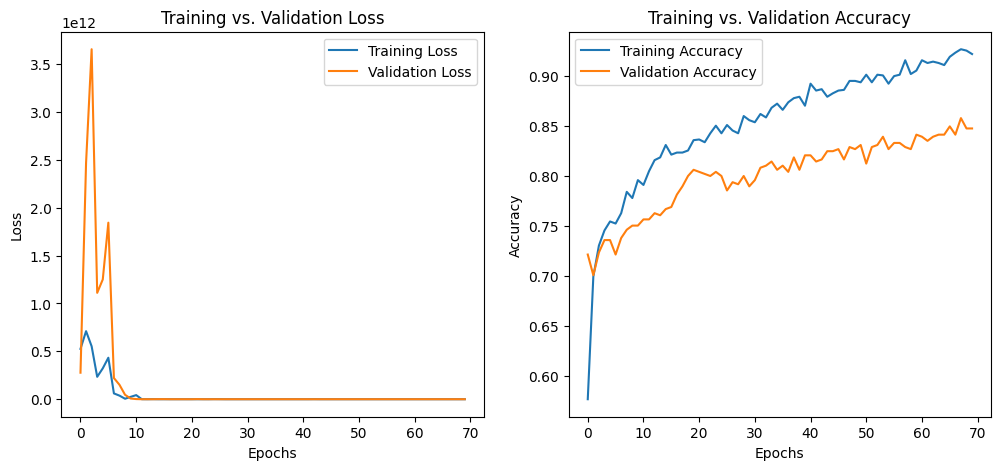

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs. Validation Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history)

In [ ]:
import numpy as np
print("Class distribution in training set:", np.unique(y_train_resampled, return_counts=True))
print("Class distribution in test set:", np.unique(y_test, return_counts=True))

Class distribution in training set: (array([0, 1]), array([968, 968]))
Class distribution in test set: (array([0, 1]), array([121, 119]))


<Axes: >

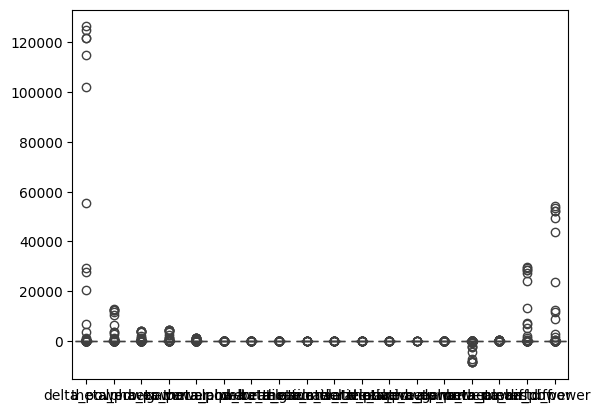

In [ ]:
import seaborn as sns
sns.boxplot(data=train_df[feature_columns])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
auc_scores = []

# Define batch_size here
batch_size = 32  # You can adjust this value

for train_idx, val_idx in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model = tuner.hypermodel.build(best_hps)
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=batch_size, validation_data=(X_val_fold, y_val_fold), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)], verbose=0)

    y_val_pred = model.predict(X_val_fold)
    val_auc = roc_auc_score(y_val_fold, y_val_pred)
    val_accuracy = accuracy_score(y_val_fold, (y_val_pred > 0.5).astype(int))

    accuracies.append(val_accuracy)
    auc_scores.append(val_auc)

print(f"Average Accuracy across folds: {np.mean(accuracies):.4f}")
print(f"Average AUC across folds: {np.mean(auc_scores):.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Average Accuracy across folds: 0.6995
Average AUC across folds: 0.7855


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
auc_scores = []

for train_idx, val_idx in skf.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model = tuner.hypermodel.build(best_hps)
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=batch_size, validation_data=(X_val_fold, y_val_fold), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)], verbose=0)

    y_val_pred = model.predict(X_val_fold)
    val_auc = roc_auc_score(y_val_fold, y_val_pred)
    val_accuracy = accuracy_score(y_val_fold, (y_val_pred > 0.5).astype(int))

    accuracies.append(val_accuracy)
    auc_scores.append(val_auc)

print(f"Average Accuracy across folds: {np.mean(accuracies):.4f}")
print(f"Average AUC across folds: {np.mean(auc_scores):.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Average Accuracy across folds: 0.7453
Average AUC across folds: 0.8137


In [ ]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved as 'best_model.pkl'")

Model saved as 'best_model.pkl'


In [ ]:
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
y_pred = loaded_model.predict(X_test_scaled)
print("Predictions:", y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions: [[7.09736422e-02]
 [8.84013474e-01]
 [9.78167534e-01]
 [1.12772048e-01]
 [2.94226021e-01]
 [4.81897127e-03]
 [5.34085989e-01]
 [6.12815283e-02]
 [5.74560285e-01]
 [5.67235947e-01]
 [3.07865757e-02]
 [8.96162868e-01]
 [7.42836416e-01]
 [9.02089477e-01]
 [7.45658517e-01]
 [3.60855972e-03]
 [9.32096541e-01]
 [5.54236650e-01]
 [9.94517505e-01]
 [5.69232583e-01]
 [2.36402303e-02]
 [9.18807089e-01]
 [9.85529065e-01]
 [6.72845662e-01]
 [6.22657090e-02]
 [7.29379337e-03]
 [3.48101735e-01]
 [7.56219447e-01]
 [8.51934601e-05]
 [9.53039944e-01]
 [2.07839813e-02]
 [1.87606756e-02]
 [4.28342633e-03]
 [9.58987951e-01]
 [3.97203024e-03]
 [2.29277864e-01]
 [9.91281033e-01]
 [9.55019951e-01]
 [2.76449043e-02]
 [1.29889771e-01]
 [7.17552245e-01]
 [3.12855452e-01]
 [3.86507623e-02]
 [9.18726325e-01]
 [4.87858385e-01]
 [9.38542247e-01]
 [8.75786543e-02]
 [9.66289818e-01]
 [4.07088734e-02]
 [1.83536321e-01]
 [6.16682589e-01]
 [4.49521661e-01]
 [2.52251387e

In [ ]:
best_model.save('best_model.keras')

print("Model saved as 'best_model.keras'")

Model saved as 'best_model.keras'


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model.keras')

y_pred = loaded_model.predict(X_test_scaled)
print("Predictions:", y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions: [[7.09736422e-02]
 [8.84013474e-01]
 [9.78167534e-01]
 [1.12772048e-01]
 [2.94226021e-01]
 [4.81897127e-03]
 [5.34085989e-01]
 [6.12815283e-02]
 [5.74560285e-01]
 [5.67235947e-01]
 [3.07865757e-02]
 [8.96162868e-01]
 [7.42836416e-01]
 [9.02089477e-01]
 [7.45658517e-01]
 [3.60855972e-03]
 [9.32096541e-01]
 [5.54236650e-01]
 [9.94517505e-01]
 [5.69232583e-01]
 [2.36402303e-02]
 [9.18807089e-01]
 [9.85529065e-01]
 [6.72845662e-01]
 [6.22657090e-02]
 [7.29379337e-03]
 [3.48101735e-01]
 [7.56219447e-01]
 [8.51934601e-05]
 [9.53039944e-01]
 [2.07839813e-02]
 [1.87606756e-02]
 [4.28342633e-03]
 [9.58987951e-01]
 [3.97203024e-03]
 [2.29277864e-01]
 [9.91281033e-01]
 [9.55019951e-01]
 [2.76449043e-02]
 [1.29889771e-01]
 [7.17552245e-01]
 [3.12855452e-01]
 [3.86507623e-02]
 [9.18726325e-01]
 [4.87858385e-01]
 [9.38542247e-01]
 [8.75786543e-02]
 [9.66289818e-01]
 [4.07088734e-02]
 [1.83536321e-01]
 [6.16682589e-01]
 [4.49521661e-01]
 [2.52251387e

In [ ]:
# import shap
# best_model.fit(X_train_scaled, y_train)
# explainer = shap.KernelExplainer(best_model.predict, X_train_scaled)
# shap_values = explainer.shap_values(X_test_scaled)
# shap.summary_plot(shap_values, X_test_scaled)

In [ ]:
!pip install shap

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_56
Received: inputs=['Tensor(shape=(100, 18, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_56
Received: inputs=['Tensor(shape=(200, 18, 1))']
  warnings.warn(msg)


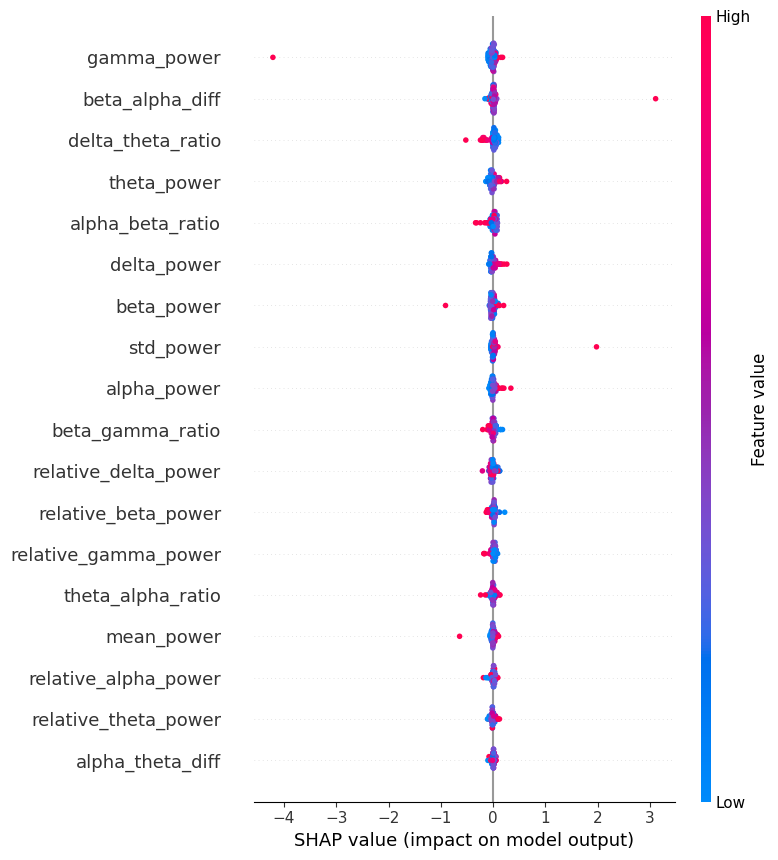

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Reshape your background data to match the input shape of the model
X_train_scaled_reshaped = X_train_scaled[:100].reshape(X_train_scaled[:100].shape[0], X_train_scaled[:100].shape[1], 1)
X_test_scaled_reshaped = X_test_scaled[:100].reshape(X_test_scaled[:100].shape[0], X_test_scaled[:100].shape[1], 1)


explainer = shap.DeepExplainer(best_model, X_train_scaled_reshaped)  # Use reshaped data
shap_values = explainer.shap_values(X_test_scaled_reshaped)  # Use reshaped data

shap_values = np.array(shap_values).squeeze()

shap.summary_plot(shap_values, X_test_scaled_reshaped[:, :, 0], feature_names=feature_columns)  # Reshape back

expected_value = explainer.expected_value[0].numpy() if hasattr(explainer.expected_value[0], 'numpy') else explainer.expected_value[0]
shap_values_instance = shap_values[0].numpy() if hasattr(shap_values[0], 'numpy') else shap_values[0]

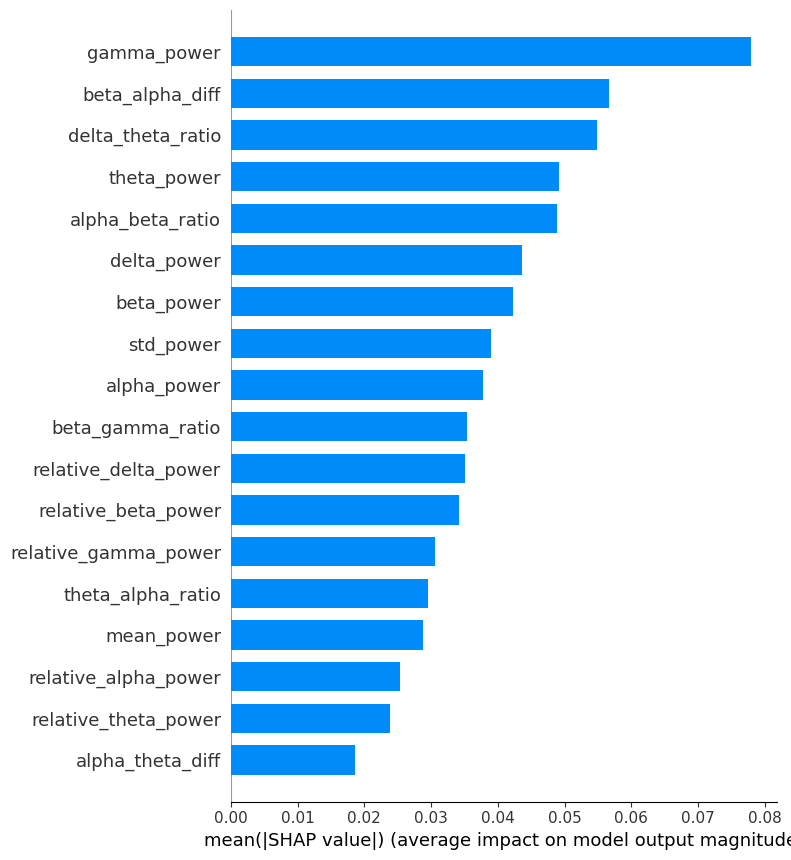

In [ ]:
shap.summary_plot(
    shap_values,
    X_test_scaled[:100],
    feature_names=feature_columns,
    plot_type="bar"
)

In [ ]:
y_pred_probs = best_model.predict(X_test_scaled)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


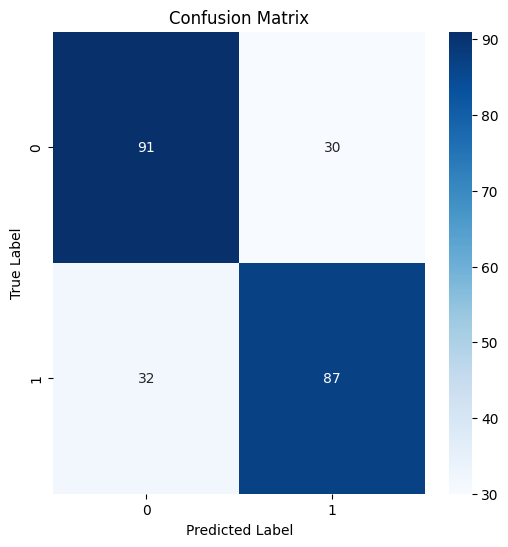

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred_classes))

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       121
           1       0.74      0.73      0.74       119

    accuracy                           0.74       240
   macro avg       0.74      0.74      0.74       240
weighted avg       0.74      0.74      0.74       240



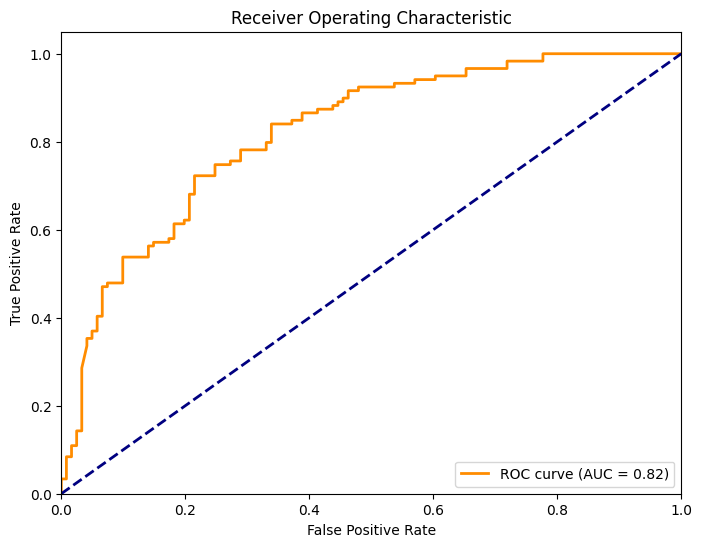

AUC Score: 0.8198


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

In [ ]:
!pip install flask
!pip install pyngrok


In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.preprocessing import RobustScaler


In [ ]:
# from pyngrok import ngrok

# # Replace with your own authtoken
# ngrok.set_auth_token("2rynqYPDj9h80DkstjlqevEMIJK_4bjnYxXedU8gypPSMAM2b")

# # Now you can start ngrok
# public_url = ngrok.connect(1290)
# print(f"Flask app is running at: {public_url}")


In [ ]:
!kill $(lsof -t -i:5001)


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [ ]:
# from pyngrok import ngrok
# ngrok.kill()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving index.html to index.html


In [ ]:
# from flask import Flask, render_template

# app = Flask(__name__)
# @app.route('/')
# def home():
#     return render_template('index.html')

# if __name__ == '__main__':
#     app.run(port=1346)


In [ ]:


# public_url = ngrok.connect(5002)
# print(f"Flask app is running at: {public_url}")


In [ ]:
# from flask import Flask, request, jsonify
# from tensorflow.keras.models import load_model
# import numpy as np
# from sklearn.preprocessing import RobustScaler
# from pyngrok import ngrok

# model = load_model('best_model.keras')

# scaler = RobustScaler()

# app = Flask(__name__)

# @app.route('/predict', methods=['POST'])
# def predict():
#     try:
#         data = request.get_json(force=True)
#         input_data = np.array(data['input'])
#         input_data_scaled = scaler.transform([input_data])

#         prediction = model.predict(input_data_scaled)
#         return jsonify({"prediction": prediction.tolist()})

#     except Exception as e:
#         return jsonify({"error": str(e)})
# def run_flask_app():
#     app.run(debug=False, host='0.0.0.0', port=5001)

# from threading import Thread
# flask_thread = Thread(target=run_flask_app)
# flask_thread.start()
# ngrok.set_auth_token("2ryrnQOrd7oRU9Ntp8zZCHNHH89_3cKrteSBr5vnvsE5JMn5p")
# public_url = ngrok.connect(5001)
# print(f"Flask app is running at: {public_url}")

In [ ]:
!pip install flask_cors

In [ ]:
from flask import Flask, request, jsonify, render_template
from flask_cors import CORS
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import RobustScaler
import pandas as pd
import joblib
from pyngrok import ngrok

app = Flask(__name__)
CORS(app)  # Enable Cross-Origin Resource Sharing

# Load model and scaler
model = tf.keras.models.load_model('best_model.keras')  # Replace with your model path
scaler = joblib.load('feature_scaler.pkl')  # Replace with your scaler path

# Ngrok setup
ngrok.set_auth_token("2ryrnQOrd7oRU9Ntp8zZCHNHH89_3cKrteSBr5vnvsE5JMn5p")
ngrok.kill()
port = 5000
tunnel = ngrok.connect(port, bind_tls=True)
public_url = tunnel.public_url
print(f" * Running on {public_url} (Press CTRL+C to quit)")


@app.route('/', methods=['GET'])
def index():
    return render_template('index.html')


@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    input_data = {
        'delta_power': [data['delta_power']],
        'theta_power': [data['theta_power']],
        'alpha_power': [data['alpha_power']],
        'beta_power': [data['beta_power']],
        'gamma_power': [data['gamma_power']]
    }

    input_data_df = pd.DataFrame(input_data)

    # Feature engineering
    feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']
    input_data_df['theta_alpha_ratio'] = input_data_df['theta_power'] / input_data_df['alpha_power']
    input_data_df['alpha_beta_ratio'] = input_data_df['alpha_power'] / input_data_df['beta_power']
    input_data_df['delta_theta_ratio'] = input_data_df['delta_power'] / input_data_df['theta_power']
    input_data_df['beta_gamma_ratio'] = input_data_df['beta_power'] / input_data_df['gamma_power']

    total_power = input_data_df[feature_columns].sum(axis=1)
    for band in feature_columns:
        input_data_df[f'relative_{band}'] = input_data_df[band] / total_power

    input_data_df['alpha_theta_diff'] = input_data_df['alpha_power'] - input_data_df['theta_power']
    input_data_df['beta_alpha_diff'] = input_data_df['beta_power'] - input_data_df['alpha_power']

    # Select the engineered features
    engineered_features = [
        'delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
        'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
        'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
        'relative_beta_power', 'relative_gamma_power',
        'alpha_theta_diff', 'beta_alpha_diff'
    ]
    input_data_engineered = input_data_df[engineered_features]

    # Scale input data
    input_data_scaled = scaler.transform(input_data_engineered)

    # Prediction
    prediction = model.predict(input_data_scaled)
    result = 'Positive' if prediction[0][0] > 0.5 else 'Negative'

    return jsonify({'prediction': result})


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=port, debug=True)


 * Running on https://d6d4-34-168-15-180.ngrok-free.app (Press CTRL+C to quit)
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
